<a href="https://colab.research.google.com/github/Tushar12S/Data-Science-Assignment-eCommerce-Transactions-Dataset/blob/main/Tushar_Shetty_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas matplotlib seaborn


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# Load the datasets
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Basic information
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [10]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Ensure data consistency
print(customers['CustomerID'].duplicated().sum())
print(products['ProductID'].duplicated().sum())
print(transactions['TransactionID'].duplicated().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0
0
0


Step 1: Generate Insights from Customer Data

Example Insight 1: Customer Distribution

Find the region with the highest number of customers to focus marketing efforts:

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-14-f5997650b24e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


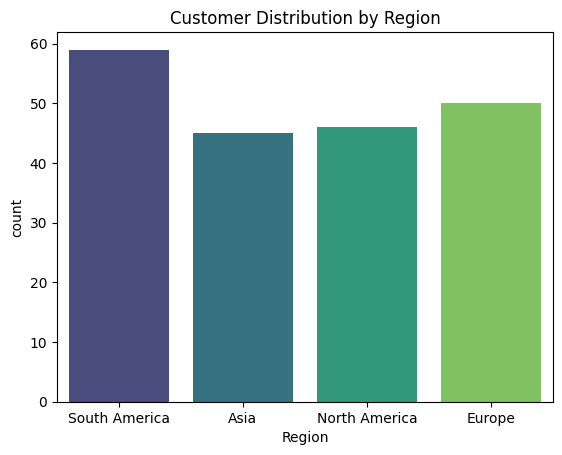

In [14]:
# Count customers by region
region_distribution = customers['Region'].value_counts()
print(region_distribution)

# Visualize customer distribution by region
sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()

Example Insight 2: Customer Signup Trends

Analyze customer signups over time to identify growth patterns:

SignupYear
2022    64
2023    57
2024    79
Name: count, dtype: int64


<ipython-input-15-4ba41e136796>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='SignupYear', palette='viridis')


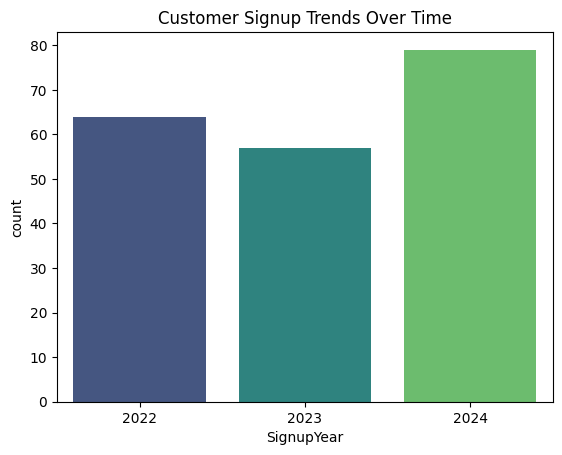

In [15]:
# Signup trends over years
customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers['SignupYear'].value_counts().sort_index()
print(signup_trends)

# Visualize the trends
sns.countplot(data=customers, x='SignupYear', palette='viridis')
plt.title('Customer Signup Trends Over Time')
plt.show()

Step 2: Generate Insights from Product Data

Example Insight 3: Top Product Categories

Identify which product categories drive the most sales.

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-16-2e41fa80da38>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='viridis')


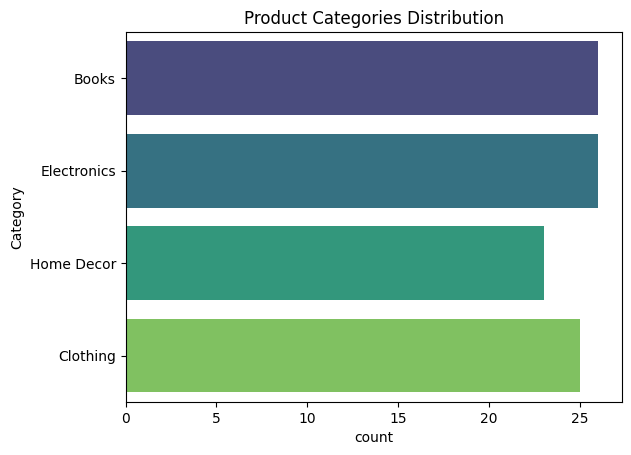

In [16]:
# Count products by category
category_distribution = products['Category'].value_counts()
print(category_distribution)

# Visualize product categories
sns.countplot(data=products, y='Category', palette='viridis')
plt.title('Product Categories Distribution')
plt.show()

Example Insight 4: Price Distribution

Understand pricing trends to align products with customer spending power.

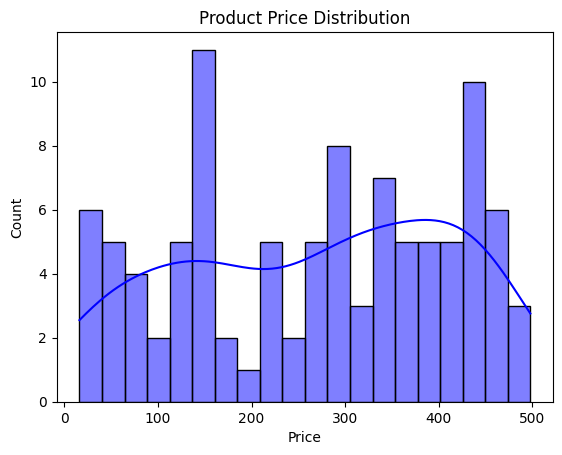

In [17]:
# Analyze price distribution
sns.histplot(data=products, x='Price', bins=20, kde=True, color='blue')
plt.title('Product Price Distribution')
plt.show()

Step 3: Generate Insights from Transaction Data

Example Insight 5: Revenue Growth

Monitor transaction trends to understand seasonal or yearly sales growth.

TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


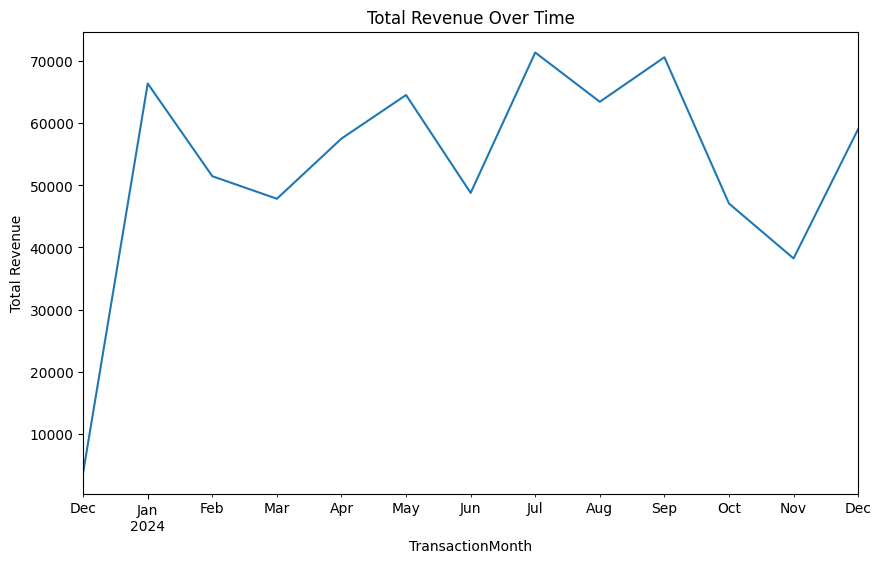

In [18]:
# Analyze monthly revenue trends
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('TransactionMonth')['TotalValue'].sum()
print(monthly_revenue)

# Visualize revenue trends
monthly_revenue.plot(kind='line', figsize=(10, 6), title='Total Revenue Over Time')
plt.ylabel('Total Revenue')
plt.show()

Example Insight 6: Top-Selling Products

Find the most sold products to adjust inventory and marketing focus.

  ProductID  Quantity            ProductName     Category   Price
0      P054        46     SoundWave Cookbook        Books   57.30
1      P059        46        SoundWave Jeans     Clothing  303.20
2      P029        45     TechPro Headphones  Electronics  433.64
3      P048        43       TechPro Cookbook        Books  416.40
4      P057        43  ActiveWear Smartphone  Electronics  239.70
5      P061        43    HomeSense Desk Lamp   Home Decor  156.96
6      P079        43         ActiveWear Rug   Home Decor  417.37
7      P062        39        HomeSense Novel        Books  374.16
8      P020        38      ActiveWear Jacket     Clothing  396.34
9      P022        38     HomeSense Wall Art   Home Decor  137.54


<ipython-input-19-ff2379f2d5d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='viridis')


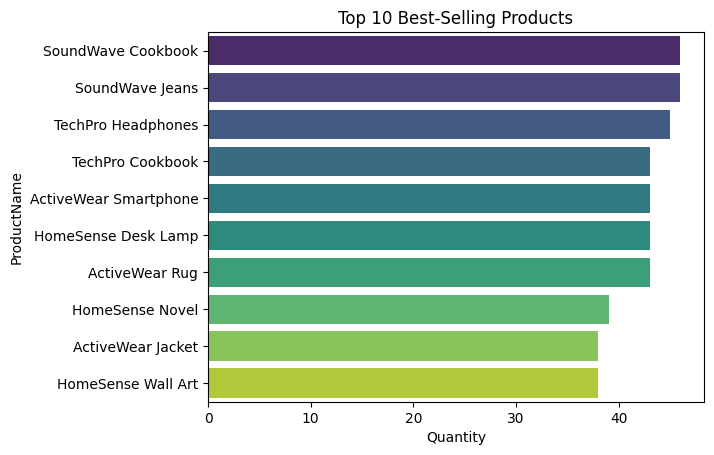

In [19]:
# Identify top-selling products
top_products = transactions.groupby('ProductID')['Quantity'].sum().nlargest(10).reset_index()
top_products = top_products.merge(products, on='ProductID')
print(top_products)

# Visualize top-selling products
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.show()